In [2]:
#Workbench imports
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from pathlib import Path

### Load results from EMA Workbench run (see notebook 30), inspect and clean the raw results

In [3]:
from ema_workbench import load_results

target = Path("temp","experiments")
experiments, outcomes = load_results(target / "2021_2_23_EMA_experiments_five_hundred.tar.gz")
experiments.tail()

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


,Housing_market,SLR,implementation_time,transient,Mayor,scenario,policy,model
395995,rational,1,4,SurgeHeight\five_hundred\five_hundred_430.csv,Lawkeeper,98995,3,Rotty
395996,rational,3,13,SurgeHeight\five_hundred\five_hundred_453.csv,Lawkeeper,98996,3,Rotty
395997,boundedly_rational,3,10,SurgeHeight\five_hundred\five_hundred_157.csv,Lawkeeper,98997,3,Rotty
395998,boundedly_rational,5,11,SurgeHeight\five_hundred\five_hundred_32.csv,Lawkeeper,98998,3,Rotty
395999,rational,6,4,SurgeHeight\five_hundred\five_hundred_308.csv,Lawkeeper,98999,3,Rotty


In [4]:
experiments2 = experiments.drop(['policy','model'],axis=1)
experiments2.head()

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,boundedly_rational,4,12,SurgeHeight\five_hundred\five_hundred_119.csv,R. Active,0
1,boundedly_rational,4,14,SurgeHeight\five_hundred\five_hundred_90.csv,R. Active,1
2,boundedly_rational,2,10,SurgeHeight\five_hundred\five_hundred_220.csv,R. Active,2
3,boundedly_rational,9,9,SurgeHeight\five_hundred\five_hundred_141.csv,R. Active,3
4,rational,5,13,SurgeHeight\five_hundred\five_hundred_7.csv,R. Active,4


In [5]:
experiments2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396000 entries, 0 to 395999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Housing_market       396000 non-null  category
 1   SLR                  396000 non-null  category
 2   implementation_time  396000 non-null  category
 3   transient            396000 non-null  category
 4   Mayor                396000 non-null  category
 5   scenario             396000 non-null  category
dtypes: category(6)
memory usage: 7.1 MB


In [6]:
outcomes

{'HP_hp_2200': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'CC_hp_2200': array([282357.9820158 , 286542.15584763,      0.        , ...,
        350017.41980036, 350036.70600789, 350040.12775439]),
 'HP_first_SETP': array([2081, 2080, 2040, ..., 2051, 2055, 9999], dtype=int64),
 'CC_first_SETP': array([2096, 2125, 2106, ..., 9999, 9999, 9999], dtype=int64)}

In [14]:
experiments2['CC_first_SETP'] = outcomes['CC_first_SETP']

In [43]:
experiments2.head()

,Housing_market,SLR,implementation_time,transient,Mayor,scenario,CC_first_SETP
0,boundedly_rational,4,12,SurgeHeight\five_hundred\five_hundred_119.csv,R. Active,0,2096
1,boundedly_rational,4,14,SurgeHeight\five_hundred\five_hundred_90.csv,R. Active,1,2125
2,boundedly_rational,2,10,SurgeHeight\five_hundred\five_hundred_220.csv,R. Active,2,2106
3,boundedly_rational,9,9,SurgeHeight\five_hundred\five_hundred_141.csv,R. Active,3,9999
4,rational,5,13,SurgeHeight\five_hundred\five_hundred_7.csv,R. Active,4,9999


# This is to explore sensitivity for storm surge scenarios

In [45]:
#Select only BR housing market
exp = experiments2.copy()
exp['transient'] = exp['transient'].apply(lambda x : int(x.split('five_hundred_')[1].split('.')[0]))
exp = exp.loc[(exp['Housing_market'] == 'boundedly_rational') & (exp['SLR'] == 3) & (exp['CC_first_SETP'] <= 2200)]
exp.head()

,Housing_market,SLR,implementation_time,transient,Mayor,scenario,CC_first_SETP
7,boundedly_rational,3,12,65,R. Active,7,2100
19,boundedly_rational,3,9,267,R. Active,19,2137
27,boundedly_rational,3,11,430,R. Active,27,2190
55,boundedly_rational,3,14,251,R. Active,55,2113
79,boundedly_rational,3,12,83,R. Active,79,2097


In [48]:
exp['transient'].value_counts()

130    56
205    52
490    47
328    46
477    45
       ..
238     6
101     6
326     6
463     5
287     4
Name: transient, Length: 500, dtype: int64

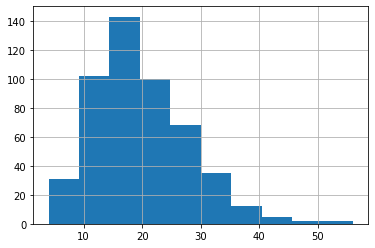

In [49]:
exp['transient'].value_counts().hist()

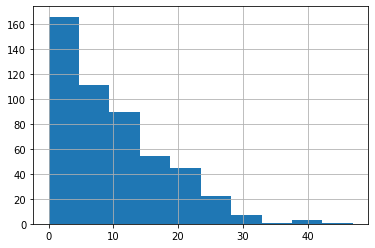

In [61]:
#Select only BR housing market
exp = experiments2.copy()
exp['transient'] = exp['transient'].apply(lambda x : int(x.split('five_hundred_')[1].split('.')[0]))
exp = exp.loc[(exp['Housing_market'] == 'boundedly_rational') &  (exp['SLR'] == 4) & (exp['CC_first_SETP'] <= 2150)]
exp['transient'].value_counts().hist()

In [62]:
exp['transient'].value_counts()

494    47
404    41
282    39
158    39
48     37
       ..
169     0
231     0
170     0
433     0
19      0
Name: transient, Length: 500, dtype: int64

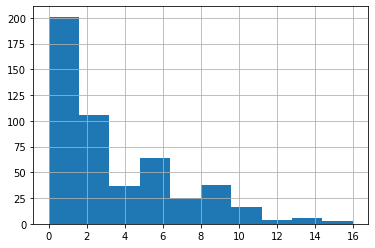

In [64]:
#Select only BR housing market
exp = experiments2.copy()
exp['transient'] = exp['transient'].apply(lambda x : int(x.split('five_hundred_')[1].split('.')[0]))
exp = exp.loc[(exp['Housing_market'] == 'boundedly_rational') & (exp['Mayor'] == 'Sentiment') & (exp['SLR'] == 4) & (exp['CC_first_SETP'] <= 2200)]
exp['transient'].value_counts().hist()

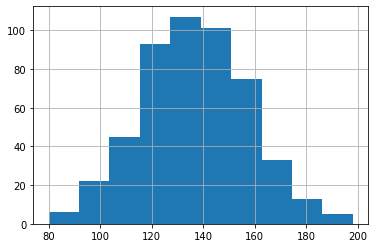

In [66]:
#Select only BR housing market
exp = experiments2.copy()
exp['transient'] = exp['transient'].apply(lambda x : int(x.split('five_hundred_')[1].split('.')[0]))
exp = exp.loc[(exp['CC_first_SETP'] <= 2200)]
exp['transient'].value_counts().hist()